In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
worldcup = pd.read_csv('../11_case-study-worldcup/data/worldcup-2018.csv')

In [4]:
worldcup.head()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,Russia,A,10,0,0,1,65,Saudi Arabia,1,-1.0,-2.0,Egypt,17,NaN,NaN,Uruguay,33,0.0,0.0,NaN
1,Saudi Arabia,A,4,0,0,0,63,Russia,1,1.0,2.0,Uruguay,18,1.0,1.0,Egypt,34,-5.0,-5.0,NaN
2,Egypt,A,2,0,0,0,31,Uruguay,2,-1.0,-2.0,Russia,17,NaN,NaN,Saudi Arabia,34,5.0,5.0,NaN
3,Uruguay,A,12,2,2,5,21,Egypt,2,1.0,2.0,Saudi Arabia,18,-1.0,-1.0,Russia,33,0.0,0.0,NaN
4,Porugal,B,6,0,0,2,3,Spain,3,-12.0,-31.0,Morocco,19,-1.0,-2.0,Iran,35,2.0,5.0,NaN


In [5]:
worldcup.describe()

,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,20.000000,20.000000,32.000000,22.000000,22.000000,32.000000,28.000000,28.000000,0.0
mean,7.906250,0.500000,0.843750,1.781250,24.781250,8.500000,0.000000,0.000000,24.500000,0.000000,0.090909,40.500000,0.000000,0.000000,NaN
std,5.426098,1.191367,2.017814,3.128788,19.536128,4.683533,4.279695,11.210897,4.683533,2.742956,7.658852,4.683533,5.354126,19.592138,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-12.000000,-31.000000,17.000000,-8.000000,-19.000000,33.000000,-17.000000,-70.000000,NaN
25%,4.000000,0.000000,0.000000,0.000000,8.750000,4.750000,-1.000000,-2.000000,20.750000,-1.000000,-2.750000,36.750000,-2.000000,-3.000000,NaN
50%,5.500000,0.000000,0.000000,0.000000,19.500000,8.500000,0.000000,0.000000,24.500000,0.000000,0.000000,40.500000,0.000000,0.000000,NaN
75%,12.000000,0.000000,0.250000,2.000000,37.500000,12.250000,1.000000,2.000000,28.250000,1.000000,2.750000,44.250000,2.000000,3.000000,NaN
max,20.000000,5.000000,8.000000,13.000000,65.000000,16.000000,12.000000,31.000000,32.000000,8.000000,19.000000,48.000000,17.000000,70.000000,NaN


In [6]:
worldcup.drop(['Unnamed: 19'],axis=1,inplace=True)

In [7]:
worldcup.isnull().sum()

Team                                       0
Group                                      0
Previous \nappearances                     0
Previous \ntitles                          0
Previous\n finals                          0
Previous\n semifinals                      0
Current \nFIFA rank                        0
First match \nagainst                      0
Match index                                0
history with \nfirst opponent\n W-L       12
history with\n first opponent\n goals     12
Second match\n against                     0
Match index.1                              0
history with\n second opponent\n W-L      10
history with\n second opponent\n goals    10
Third match\n against                      0
Match index.2                              0
history with\n third opponent\n W-L        4
history with\n third opponent\n goals      4
dtype: int64

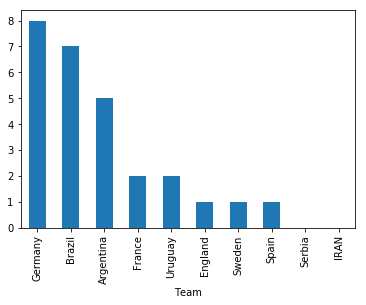

In [8]:
worldcup \
    .groupby('Team')['Previous\n finals'].sum() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot.bar()

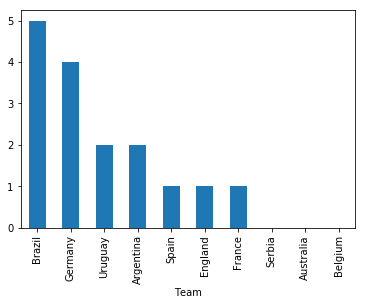

In [9]:
worldcup \
    .groupby('Team')['Previous \ntitles'].sum() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot.bar()

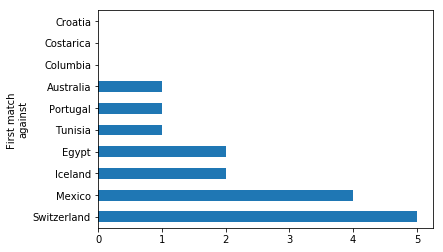

In [33]:
worldcup.groupby('First match \nagainst')['Previous \ntitles'].sum().sort_values(ascending=False).head(10).plot.barh()

In [37]:
worldcup.isnull().sum()

Team                                       0
Group                                      0
Previous \nappearances                     0
Previous \ntitles                          0
Previous\n finals                          0
Previous\n semifinals                      0
Current \nFIFA rank                        0
First match \nagainst                      0
Match index                                0
history with \nfirst opponent\n W-L       12
history with\n first opponent\n goals     12
Second match\n against                     0
Match index.1                              0
history with\n second opponent\n W-L      10
history with\n second opponent\n goals    10
Third match\n against                      0
Match index.2                              0
history with\n third opponent\n W-L        4
history with\n third opponent\n goals      4
index                                      0
dtype: int64

In [100]:
prev = worldcup.groupby(['Team','Current \nFIFA rank']) \
                [['Previous\n finals','Previous \ntitles','Previous\n semifinals']] \
                .sum() \
                .sort_values(ascending=True,by=['Current \nFIFA rank']) #\
#                 .plot \
#                 .barh(figsize=(15,10))
# prevfinal = prev.to_frame().reset_index()
prev.reset_index().head()

,Team,Current \nFIFA rank,Previous\n finals,Previous \ntitles,Previous\n semifinals
0,Germany,1,8,4,13
1,Brazil,2,7,5,11
2,Porugal,3,0,0,2
3,Argentina,4,5,2,5
4,Belgium,5,0,0,1


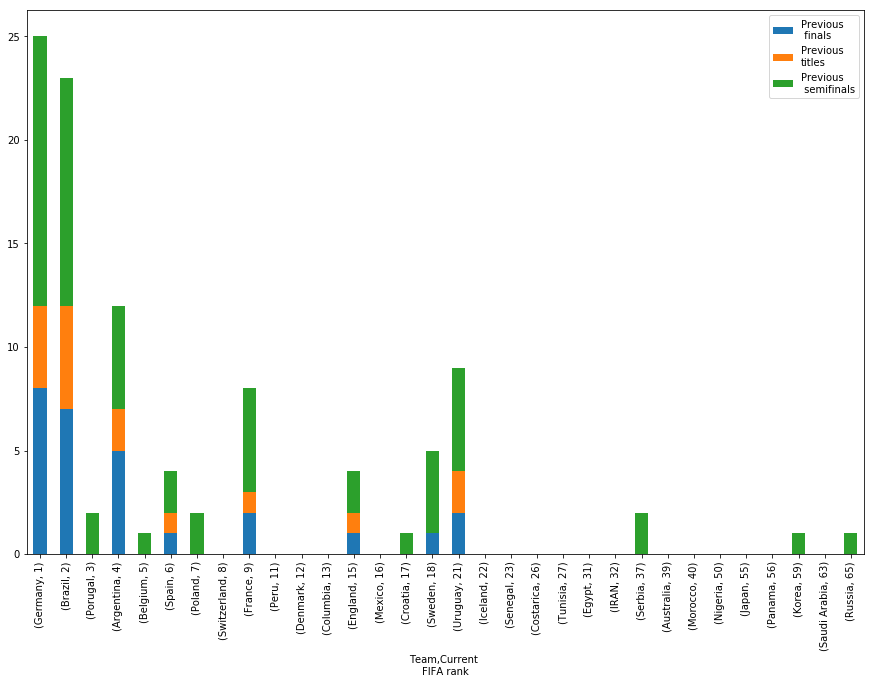

In [108]:
prev.plot(kind='bar', stacked=True, figsize=(15,10))

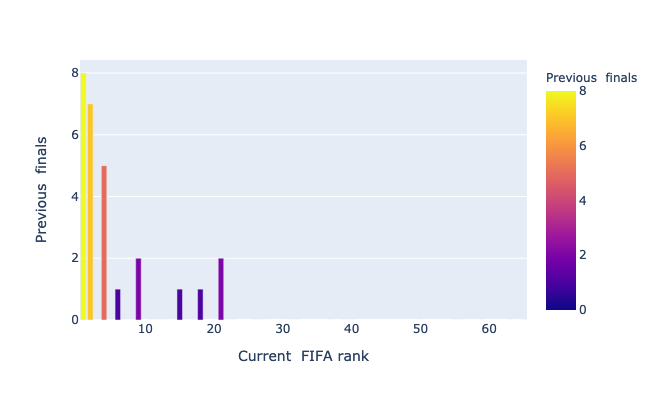

In [91]:


import plotly.express as px
# data = px.data.gapminder()

# data_canada = data[data.country == 'Canada']

fig = px.bar(prevfinal, x='Current \nFIFA rank', y='Previous\n finals',
             hover_data=['Previous\n finals','Team'], color='Previous\n finals',
             labels={'pop':'population of Canada'}, height=400)
fig.show()


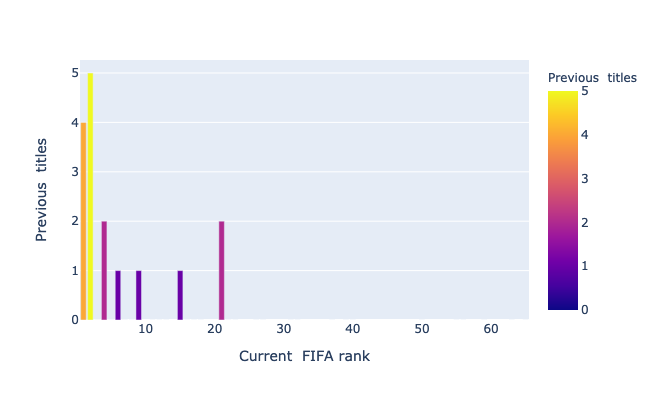

In [89]:


import plotly.express as px
# data = px.data.gapminder()

# data_canada = data[data.country == 'Canada']

fig = px.bar(prevtitles, x='Current \nFIFA rank', y='Previous \ntitles',
             hover_data=['Previous \ntitles','Team'], color='Previous \ntitles',
             labels={'pop':'population of Canada'}, height=400)
fig.show()


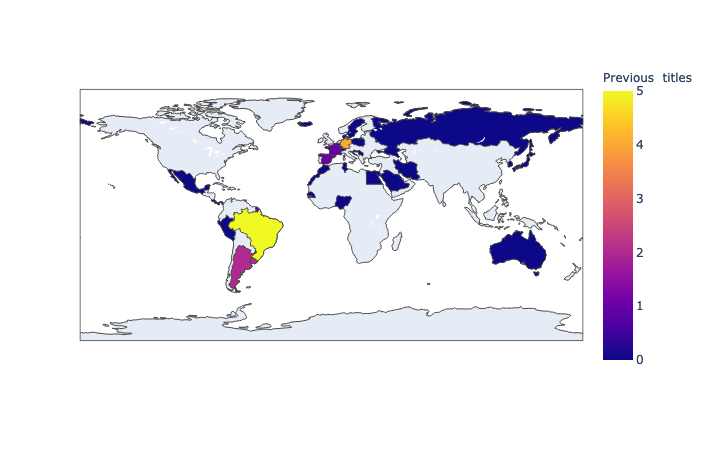

In [110]:
import plotly.express as px

# df = px.data.gapminder().query("year==2007")
# print(df['iso_alpha'])
fig = px.choropleth(worldcup, locations="Team",
                    color="Previous \ntitles", # lifeExp is a column of gapminder
                    hover_name="Team", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   locationmode = 'country names')
fig.show()

In [168]:
ng = worldcup.groupby(['Team','First match \nagainst','Current \nFIFA rank']) \
                [['Previous\n finals','Previous \ntitles','Previous\n semifinals']] \
                .sum()  #\
ng.reset_index(inplace=True)
ng['Rank_Rev'] = list(reversed(ng['Current \nFIFA rank'].tolist()))
ng

,Team,First match \nagainst,Current \nFIFA rank,Previous\n finals,Previous \ntitles,Previous\n semifinals,Rank_Rev
0,Argentina,Iceland,4,5,2,5,21
1,Australia,France,39,0,0,0,27
2,Belgium,Panama,5,0,0,1,8
3,Brazil,Switzerland,2,7,5,11,18
4,Columbia,Japan,13,0,0,0,6
5,Costarica,Serbia,26,0,0,0,37
6,Croatia,Nigeria,17,0,0,1,23
7,Denmark,Peru,12,0,0,0,63
8,Egypt,Uruguay,31,0,0,0,65
9,England,Tunisia,15,1,1,2,3


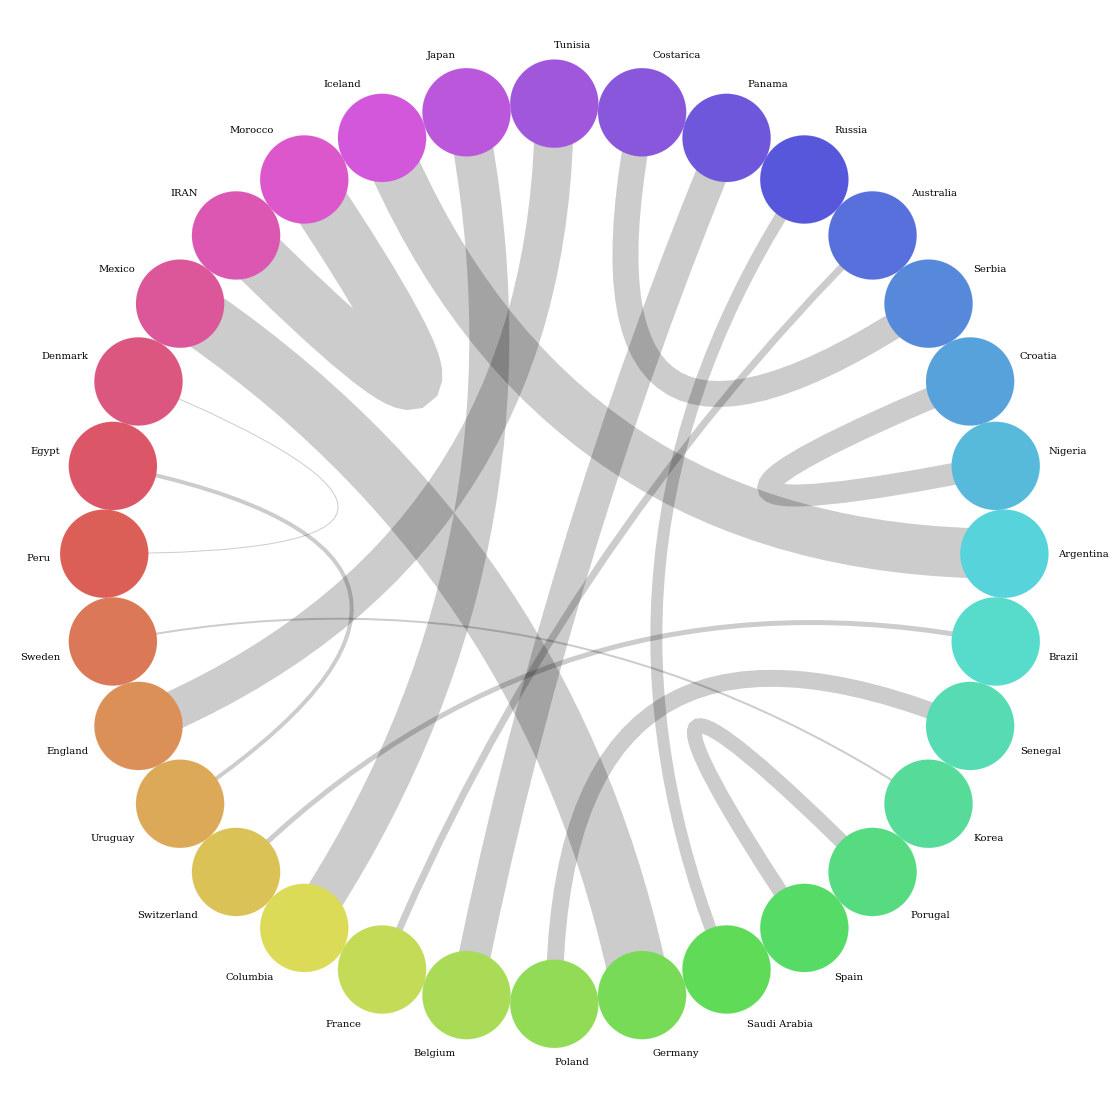

In [186]:
from itertools import combinations
import networkx as nx
from nxviz.plots import CircosPlot
from collections import Counter

# Create a dataframe with the connections
# df = pd.DataFrame(worldcup, columns=["Team", "First match \nagainst"])
# df_graph = df.groupby(["Team", "First match \nagainst"]).size().reset_index()
# df_graph.columns = ["Team", "First match \nagainst", "Count"]


G = nx.from_pandas_edgelist(
    ng,
    source="Team",
    target="First match \nagainst",
    edge_attr=["Rank_Rev",'Previous \ntitles']
)

top50_nodes = (n for n in list(G.nodes()) if n in list(ng["Team"]))

G_50 = G.subgraph(top50_nodes)

for n in G_50.nodes():
    G_50.node[n]["Rank_Rev"] = \
    int(ng[ng["Team"] == n]["Rank_Rev"])
    
for n in G_50.nodes():
    G_50.node[n]["Previous \ntitles"] = \
    int(ng[ng["Team"] == n]["Previous \ntitles"])


c = CircosPlot(
    G_50,
    dpi=1600,
    node_grouping="Rank_Rev",
    edge_width="Rank_Rev",
    figsize=(20, 20),
    node_color="Rank_Rev",
    node_labels=True,
)
c.draw()
plt.show()
